(-7.0, 7.0)

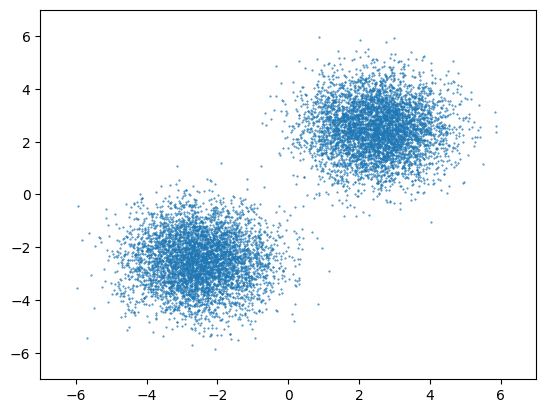

In [32]:
import torch
import torch.nn as nn
import torch_sgld
import seaborn as sns
import matplotlib.pyplot as plt

N = 10000
d = 2
data = torch.randn((int(N/2),d)) + 2.5
data2 = torch.randn((int(N/2),d)) - 2.5
data = torch.cat((data, data2), dim=0)


plt.scatter(data[:,0], data[:,1], s=0.2)
plt.xlim([-7, 7])
plt.ylim([-7, 7])

In [69]:
h = 10
E = nn.Sequential(nn.Linear(d, h), nn.ReLU(), nn.Linear(h, h), nn.ReLU(),nn.Linear(h, 1)).to('cuda')
data = data.to('cuda')

max_iter = 100000


x = torch.randn((N,2), device='cuda')*5.0
x.requires_grad=True
optimizer = torch.optim.Adam(E.parameters(), lr=0.01)
sampler = torch_sgld.SGLD([x], lr=0.01) 

chain_length=10

for i in range(max_iter):
    for i in range(chain_length):
        sampler.zero_grad()
        potential = E(x)
        potential.sum().backward()
        sampler.step()
    optimizer.zero_grad()
    loss = E(data).sum() - E(x).sum()
    loss.backward()
    optimizer.step()


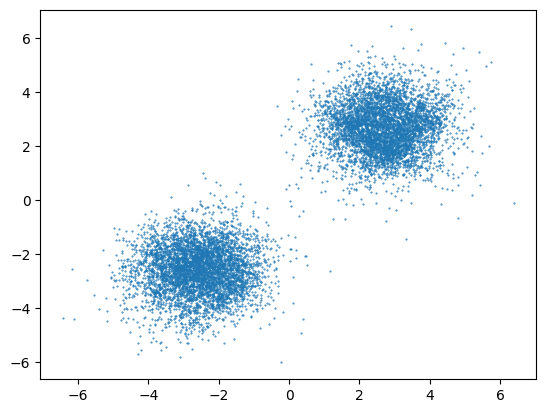

In [70]:
plt.scatter(x[:,0].cpu().detach().numpy(), x[:,1].cpu().detach().numpy(), s=0.2)


In [71]:
x = torch.randn((N,2), requires_grad=True, device='cuda')
sampler = torch_sgld.SGLD([x], lr=0.01) 

chain_length = 50000
for i in range(chain_length):
    sampler.zero_grad()
    potential = E(x)
    potential.sum().backward()
    sampler.step()

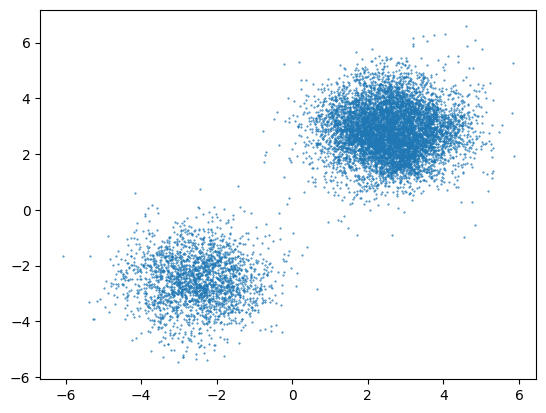

In [72]:
plt.scatter(x[:,0].cpu().detach().numpy(), x[:,1].cpu().detach().numpy(), s=0.2)
# plt.xlim([-40, 40])
# plt.ylim([-40, 40])